<a href="https://colab.research.google.com/github/Venumurala91/Numpy/blob/main/Cricker_innings_delivery_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# d=np.arange(1,65).reshape(4,4,4)
# d
# d.ndim


3

In [52]:
data=pd.read_csv('/content/innings_deliveries.csv')

In [53]:
data.head()

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]


In [54]:
data.shape

(247, 11)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   team         247 non-null    object
 1   over         247 non-null    int64 
 2   batter       247 non-null    object
 3   bowler       247 non-null    object
 4   non_striker  247 non-null    object
 5   runs_batter  247 non-null    int64 
 6   runs_extras  247 non-null    int64 
 7   runs_total   247 non-null    int64 
 8   player_out   19 non-null     object
 9   wicket_kind  19 non-null     object
 10  fielders     247 non-null    object
dtypes: int64(4), object(7)
memory usage: 21.4+ KB


In [14]:
data.columns

Index(['team', 'over', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'player_out', 'wicket_kind', 'fielders'],
      dtype='object')

In [63]:
data.isnull().sum()

,0
team,0
over,0
batter,0
bowler,0
non_striker,0
runs_batter,0
runs_extras,0
runs_total,0
player_out,228
wicket_kind,228


In [64]:
data.head(3)

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]


In [170]:
# data['player_out'] = data['player_out'].fillna('Not Out')
# data['wicket_kind'] = data['wicket_kind'].fillna('None')


In [66]:
data.head(3)

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,Not Out,None,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,Not Out,None,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,Not Out,None,[]


In [74]:
teams = data['team'].value_counts()
teams

,count
team,
Royal Challengers Bengaluru,127
Delhi Capitals,120


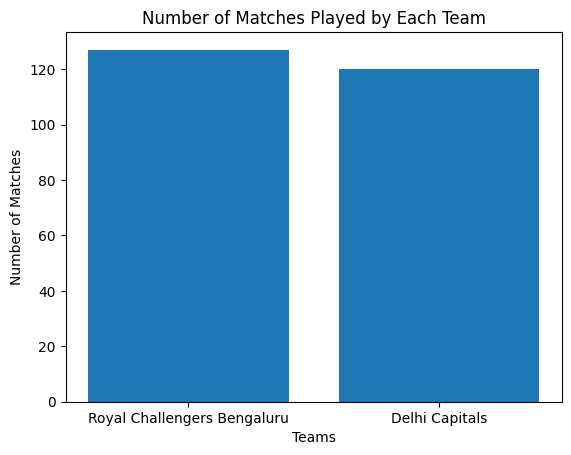

In [75]:
plt.bar(teams.index, teams.values)
plt.xlabel('Teams')
plt.ylabel('Number of Matches')
plt.title('Number of Matches Played by Each Team')
plt.show()



In [77]:

data.columns

Index(['team', 'over', 'batter', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'runs_total', 'player_out', 'wicket_kind', 'fielders'],
      dtype='object')

In [95]:
data.rename(columns={'batter': 'batsman','runs_total':'total_runs'}, inplace=True)
data.head(2)

,team,over,batsman,bowler,non_striker,runs_batter,runs_extras,total_runs,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,Not Out,None,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,Not Out,None,[]


In [96]:
runs_by_batsman = data.groupby('batsman')['total_runs'].sum()
runs_by_batsman


,total_runs
batsman,
AR Patel,59
Abishek Porel,2
C Green,33
DA Warner,1
F du Plessis,7
I Sharma,1
J Fraser-McGurk,21
KD Karthik,0
KV Sharma,7


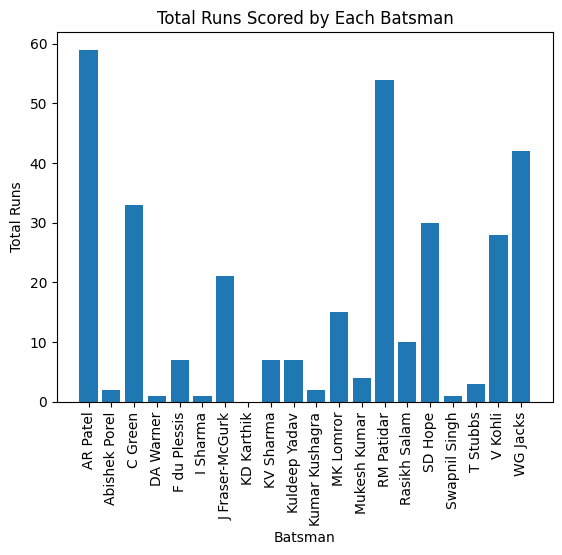

In [97]:
plt.bar(runs_by_batsman.index, runs_by_batsman.values)
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.title('Total Runs Scored by Each Batsman')
plt.xticks(rotation=90)
plt.show()

In [125]:
dc_batsman_runs=data[data['team']=='Delhi Capitals'].groupby('batsman')['total_runs'].sum()
dc_batsman_runs

rcb_batsman_runs=data[data['team']=='Royal Challengers Bangalore'].groupby('batsman')['total_runs'].sum()
rcb_batsman_runs

,total_runs
batsman,


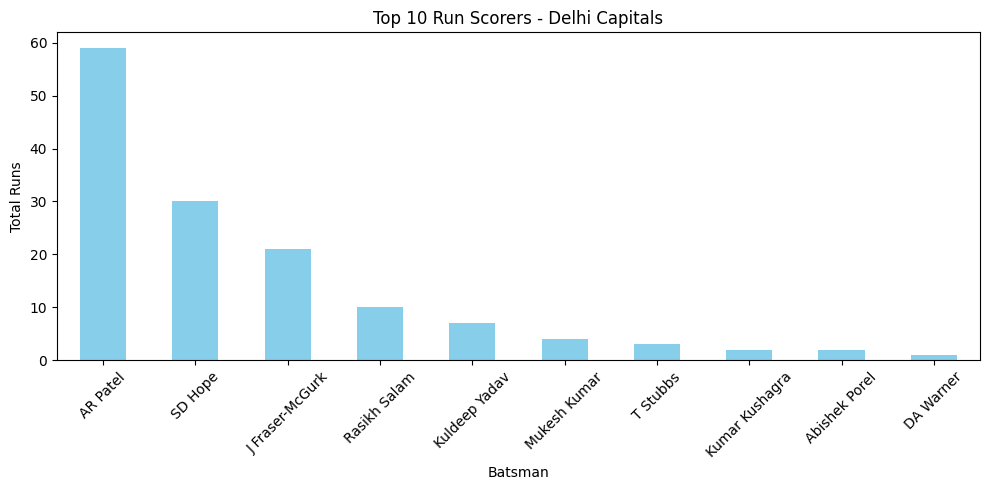

In [102]:
import matplotlib.pyplot as plt

# Delhi Capitals
dc_batsman_runs.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Top 10 Run Scorers - Delhi Capitals')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# # Royal Challengers Bangalore



<ipython-input-129-5585767fd600>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dc_df, x='batsman', y='total_runs', palette='Blues_d')


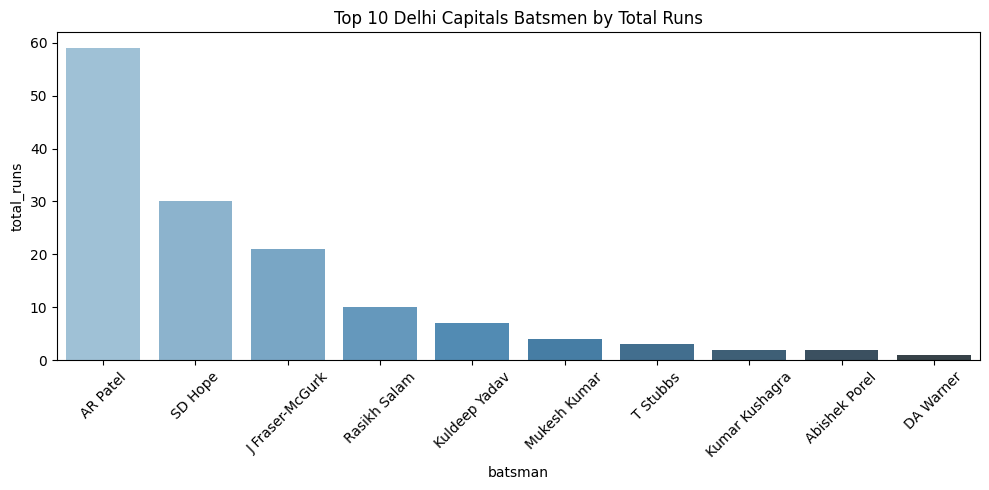

In [129]:
import seaborn as sns

# Convert to DataFrames for seaborn
dc_df = dc_batsman_runs.sort_values(ascending=False).head(10).reset_index()
rcb_df = rcb_batsman_runs.sort_values(ascending=False).head(10).reset_index()
# rcb_df
# Plot Delhi Capitals
plt.figure(figsize=(10,5))
sns.barplot(data=dc_df, x='batsman', y='total_runs', palette='Blues_d')
plt.title('Top 10 Delhi Capitals Batsmen by Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [131]:
data.columns

Index(['team', 'over', 'batsman', 'bowler', 'non_striker', 'runs_batter',
       'runs_extras', 'total_runs', 'player_out', 'wicket_kind', 'fielders'],
      dtype='object')

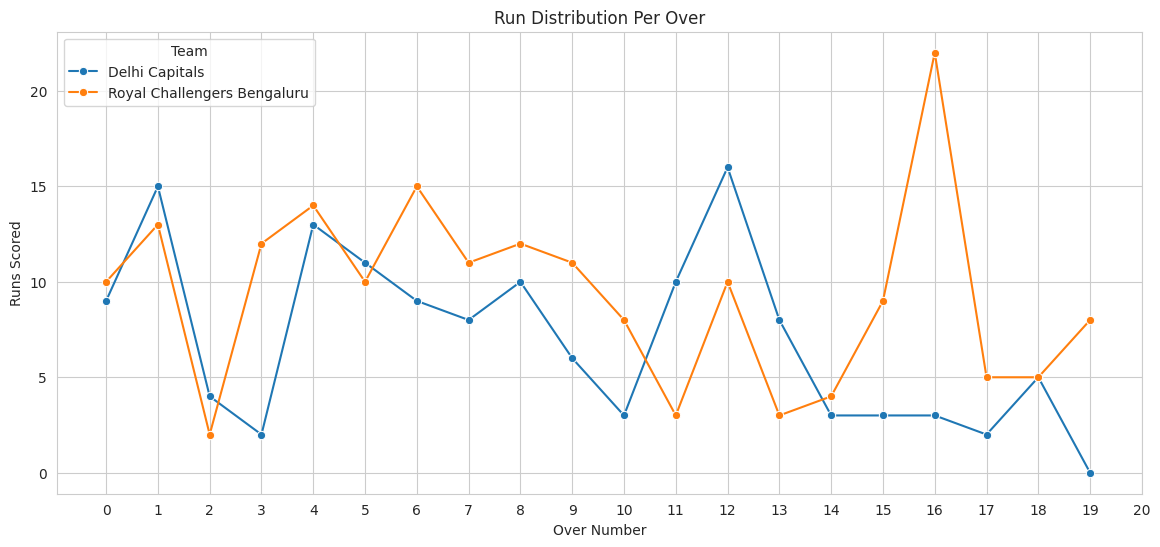

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

# data preparation for run distribution per over
run_distribution = data.groupby(['team', 'over']).agg({'total_runs': 'sum'}).reset_index()

# plotting run distribution per over for both teams
plt.figure(figsize=(14, 6))
sns.lineplot(data=run_distribution, x='over', y='total_runs', hue='team', marker='o')
plt.title('Run Distribution Per Over')
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0, 21))  # over numbers from 0 to 20
plt.legend(title='Team')
plt.show()




In [149]:
data.rename(columns={'batsman': 'batter','total_runs':'runs_total'}, inplace=True)


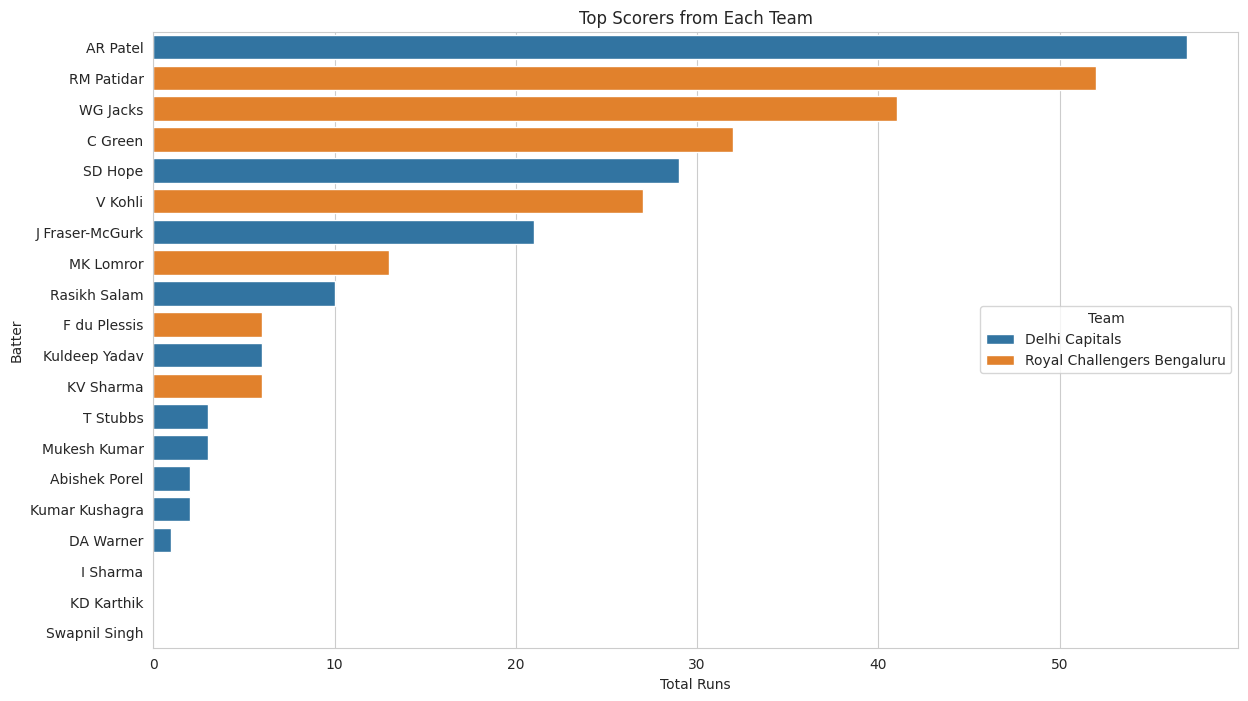

In [151]:
top_scorers = data.groupby(['team', 'batter']).agg({'runs_batter': 'sum'}).reset_index().sort_values(by='runs_batter', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_scorers, x='runs_batter', y='batter', hue='team', dodge=False)
plt.title('Top Scorers from Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Team', loc='center right')
plt.show()



In [153]:
deliveries_df=data

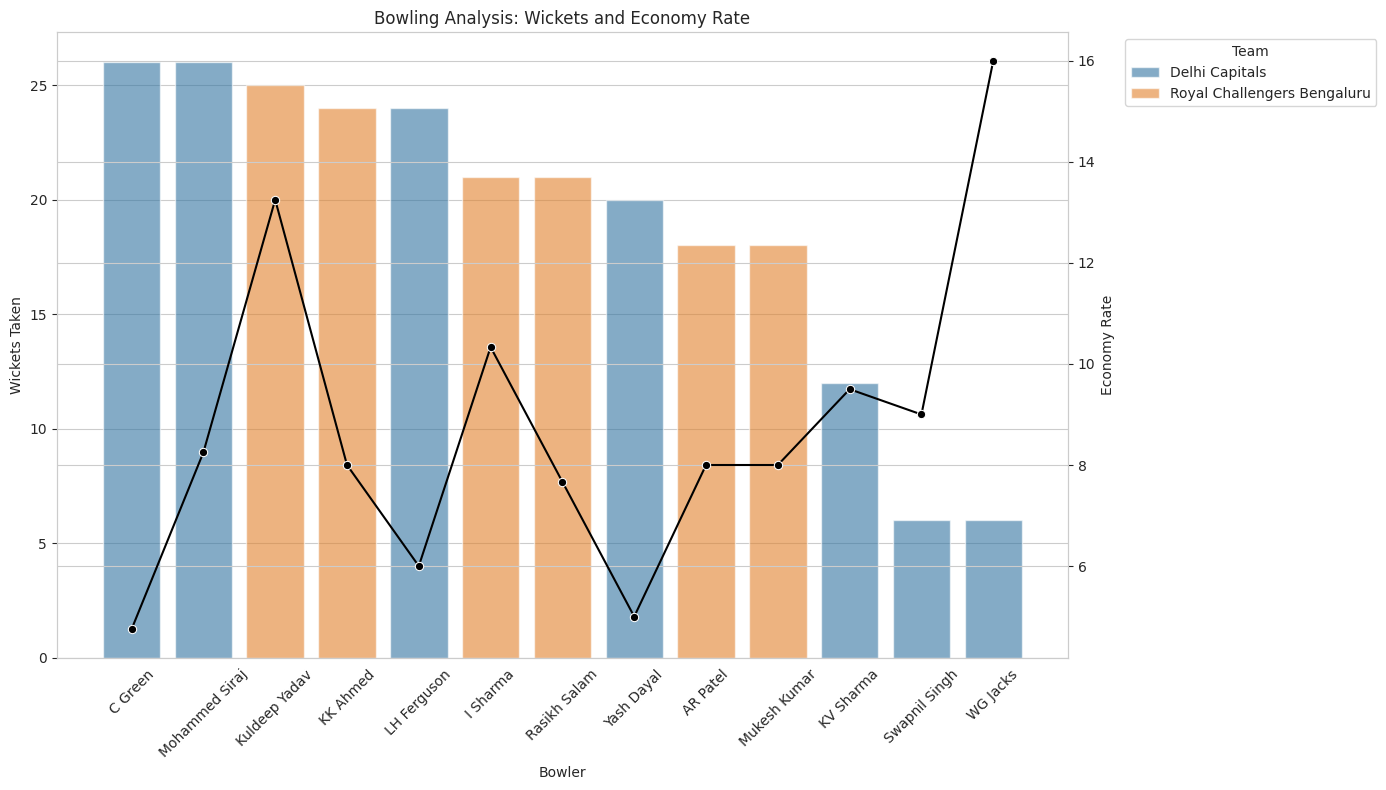

In [166]:
deliveries_df['wickets_taken'] = deliveries_df['wicket_kind'].notna().astype(int)
bowling_stats = deliveries_df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()

# calculating economy rate (total runs conceded / number of overs bowled)
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']

# sorting the data for better visualization
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# prepare the DataFrame for plotting
bowling_stats_sorted['wickets_taken'] = deliveries_df['wicket_kind'].notna().astype(int)
bowling_stats = deliveries_df.groupby(['team', 'bowler']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'nunique'}).reset_index()
bowling_stats['economy_rate'] = bowling_stats['runs_total'] / bowling_stats['over']
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for wickets
sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='team', ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

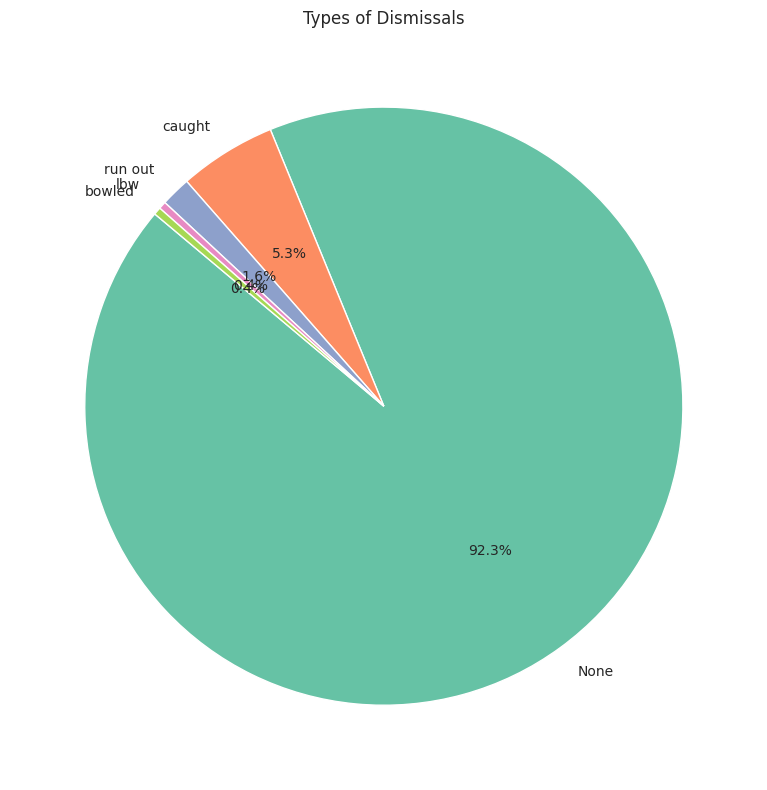

In [173]:
dismissal_types = deliveries_df['wicket_kind'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Types of Dismissals')
plt.tight_layout()
plt.show()

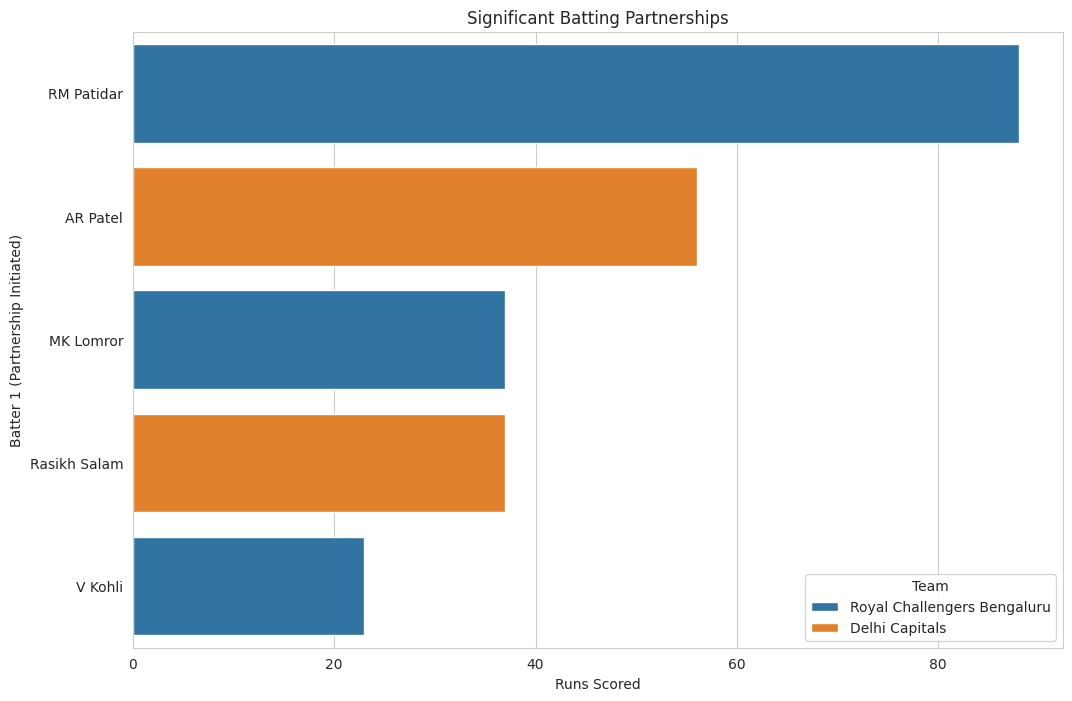

In [207]:
def calculate_partnerships(df):
    partnerships = []
    current_partnership = {}
    c=0
    c1=0
    for i, row in df.iterrows():


      if i == 0 or (row['batter'] not in current_partnership.values()):
          if current_partnership:
              partnerships.append(current_partnership)
          current_partnership = {
              'team': row['team'],
              'batter1': row['batter'],
              'batter2': row['non_striker'],
              'runs': 0,
              'balls': 0
          }



      current_partnership['runs'] += row['runs_total']
      current_partnership['balls'] += 1




      if 'player_out' in row and pd.notna(row['player_out']):
          if row['player_out'] == current_partnership['batter1'] or row['player_out'] == current_partnership['batter2']:
              partnerships.append(current_partnership)
              # print(row['player_out'])
              # print(current_partnership)
              current_partnership = {}

      #         c+=1


      #         if c==2:
      #           break
      # if c==2:
      #   break

    # append the last partnership if not ended by a wicket
    if current_partnership:
        partnerships.append(current_partnership)
    return partnerships

# calculate partnerships
partnerships_data = calculate_partnerships(deliveries_df)
partnerships_df = pd.DataFrame(partnerships_data)

# filter out significant partnerships (e.g., partnerships with more than 20 runs)
significant_partnerships = partnerships_df[partnerships_df['runs'] > 20]

# sort by highest runs
significant_partnerships = significant_partnerships.sort_values(by='runs', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=significant_partnerships, x='runs', y='batter1', hue='team', dodge=False)
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('Batter 1 (Partnership Initiated)')
plt.legend(title='Team')
plt.show()


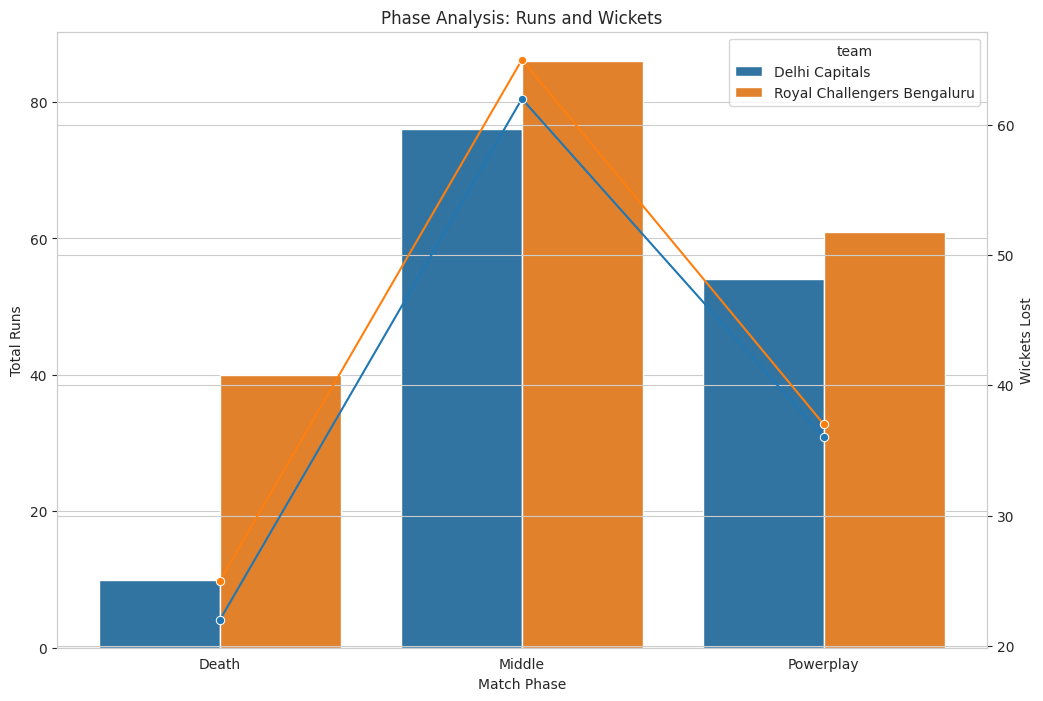

In [209]:
# function to classify the phase of the game based on the over number
def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

# adding phase information to the dataframe
deliveries_df['phase'] = deliveries_df['over'].apply(classify_phase)

# grouping data by phase and team to calculate runs and wickets
phase_analysis = deliveries_df.groupby(['team', 'phase']).agg({'runs_total': 'sum', 'wickets_taken': 'sum', 'over': 'count'}).rename(columns={'over': 'balls'}).reset_index()

# calculating the run rate
phase_analysis['run_rate'] = (phase_analysis['runs_total'] / phase_analysis['balls']) * 6

# plotting the phase analysis
fig, ax1 = plt.subplots(figsize=(12, 8))

# bar plot for runs scored in each phase
sns.barplot(data=phase_analysis, x='phase', y='runs_total', hue='team', ax=ax1)
ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')

# line plot for wickets lost
ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='phase', y='wickets_taken', hue='team', marker='o', ax=ax2, legend=False)
ax2.set_ylabel('Wickets Lost')

plt.show()



In [218]:
bowler_wickets = deliveries_df.groupby('bowler')['wickets_taken'].sum().reset_index()
bowler_wickets

,bowler,wickets_taken
0,AR Patel,18
1,C Green,26
2,I Sharma,21
3,KK Ahmed,24
4,KV Sharma,12
5,Kuldeep Yadav,25
6,LH Ferguson,24
7,Mohammed Siraj,26
8,Mukesh Kumar,18
9,Rasikh Salam,21


In [220]:
# calculate runs and balls faced for each batter
batter_stats = deliveries_df.groupby('batter').agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# calculate strike rate for each batter (runs per 100 balls)
batter_stats['strike_rate'] = (batter_stats['runs_batter'] / batter_stats['balls_faced']) * 100

# sorting batters by their strike rate
batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)

# displaying calculated strike rates along with runs scored and balls faced
batter_stats_sorted.head(10)

,batter,runs_batter,balls_faced,strike_rate
6,J Fraser-McGurk,21,8,262.500000
18,V Kohli,27,14,192.857143
13,RM Patidar,52,34,152.941176
8,KV Sharma,6,4,150.000000
0,AR Patel,57,40,142.500000
19,WG Jacks,41,30,136.666667
2,C Green,32,24,133.333333
11,MK Lomror,13,10,130.000000
15,SD Hope,29,24,120.833333
4,F du Plessis,6,7,85.714286


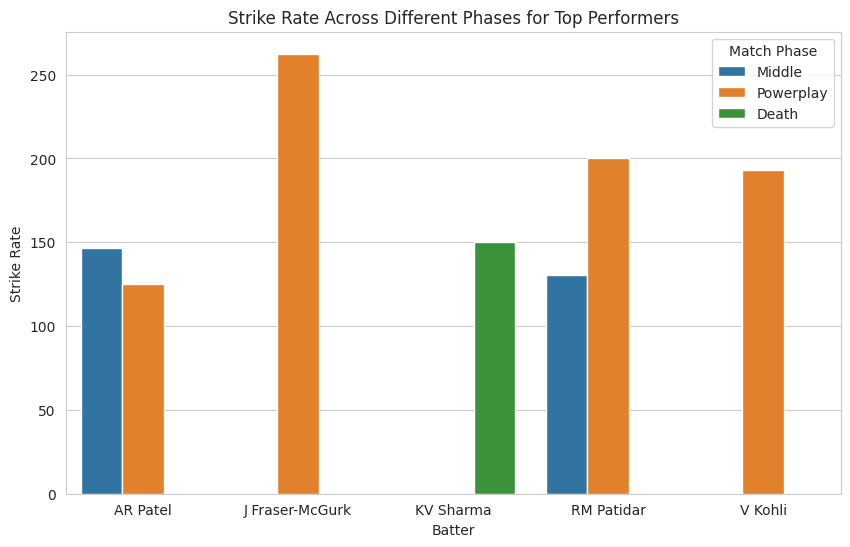

In [221]:
# merging phase information with batter stats
batter_phase_stats = deliveries_df.groupby(['batter', 'phase']).agg({'runs_batter': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# calculate strike rate for each batter-phase combination
batter_phase_stats['strike_rate'] = (batter_phase_stats['runs_batter'] / batter_phase_stats['balls_faced']) * 100

# filtering for top performers based on overall strike rate
top_performers = batter_stats_sorted.head(5)['batter']
batter_phase_stats_top = batter_phase_stats[batter_phase_stats['batter'].isin(top_performers)]

# plotting strike rate across different phases for top performers
plt.figure(figsize=(10, 6))
sns.barplot(data=batter_phase_stats_top, x='batter', y='strike_rate', hue='phase')
plt.title('Strike Rate Across Different Phases for Top Performers')
plt.xlabel('Batter')
plt.ylabel('Strike Rate')
plt.legend(title='Match Phase')
plt.show()






<ipython-input-222-cc1b8efb0c2d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
<ipython-input-222-cc1b8efb0c2d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6


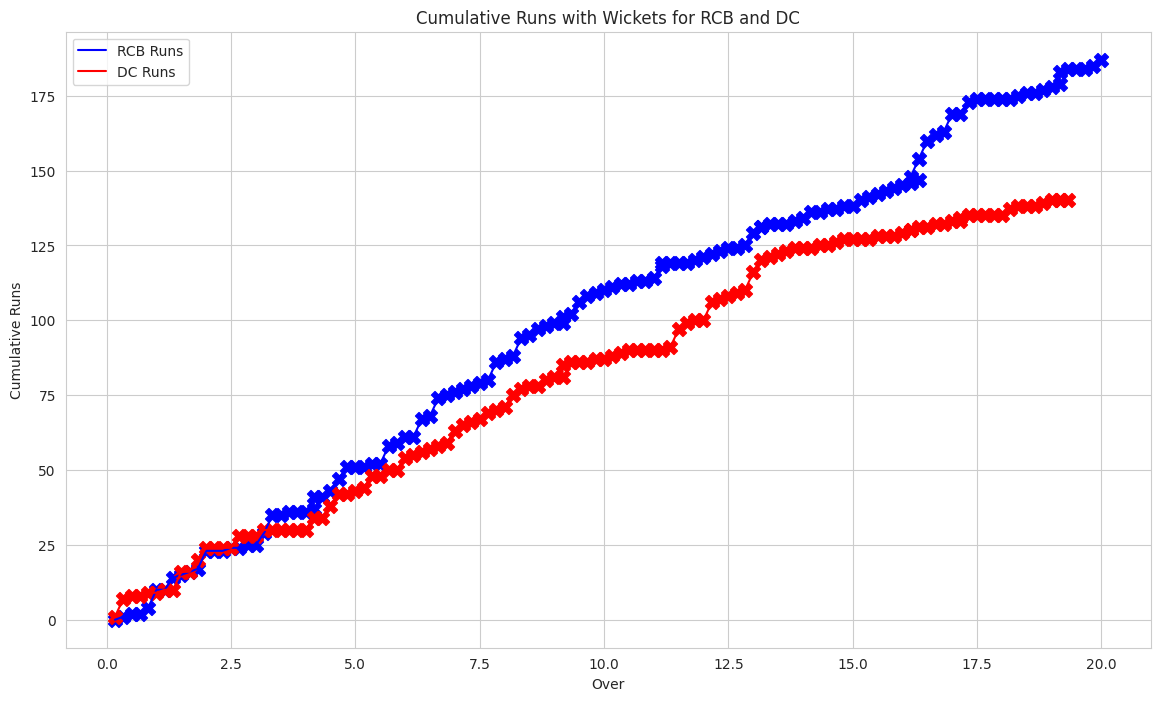

In [222]:
# calculate cumulative runs and wickets for each ball for both teams
deliveries_df['cumulative_runs'] = deliveries_df.groupby('team')['runs_total'].cumsum()
deliveries_df['cumulative_wickets'] = deliveries_df.groupby('team')['wickets_taken'].cumsum()

# separate data for both teams
rcb_deliveries = deliveries_df[deliveries_df['team'] == 'Royal Challengers Bengaluru']
dc_deliveries = deliveries_df[deliveries_df['team'] == 'Delhi Capitals']

# calculating overs for cumulative analysis
rcb_deliveries['over_ball'] = rcb_deliveries['over'] + (rcb_deliveries.groupby('over').cumcount() + 1) / 6
dc_deliveries['over_ball'] = dc_deliveries['over'] + (dc_deliveries.groupby('over').cumcount() + 1) / 6

# plotting cumulative run rates and wickets
fig, ax = plt.subplots(figsize=(14, 8))

# plot for RCB
ax.plot(rcb_deliveries['over_ball'], rcb_deliveries['cumulative_runs'], color='blue', label='RCB Runs')
ax.scatter(rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['over_ball'], rcb_deliveries[rcb_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='blue', marker='X', s=100)

# plot for DC
ax.plot(dc_deliveries['over_ball'], dc_deliveries['cumulative_runs'], color='red', label='DC Runs')
ax.scatter(dc_deliveries[dc_deliveries['wickets_taken'] == 1]['over_ball'], dc_deliveries[dc_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='red', marker='X', s=100)

ax.set_title('Cumulative Runs with Wickets for RCB and DC')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()

In [ ]:
# calculate cumulative runs and wickets for each ball for both teams
deliveries_df['cumulative_runs'] = deliveries_df.groupby('team')['runs_total'].cumsum()





